In [1]:
from tensorflow.keras.applications import ResNet50
#preprocess the image before passing to the ResNet50 model
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, Conv2D, MaxPooling2D, MaxPool2D, Flatten
from keras.optimizers import SGD, Adam

import matplotlib.pyplot as plt

In [2]:
model = Sequential()

In [3]:
model.add(Conv2D(input_shape = (224,224,3),filters = 16, kernel_size = (3,3), strides = (2,2),
                padding='valid',kernel_initializer = 'he_normal',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides = (1,1)))

model.add(Flatten())

model.add(Dense(10, kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization())

In [4]:
model.add(Dense(2,activation = 'softmax'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 193600)            0         
                                                                 
 dense (Dense)               (None, 10)                1936010   
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 2)                 2

In [6]:
optim = Adam()
model.compile(optimizer = optim, loss = 'categorical_crossentropy', metrics = ['accuracy'] )

In [7]:
from keras.preprocessing.image import ImageDataGenerator 

In [26]:
data_generator = ImageDataGenerator(horizontal_flip = True,
                                    featurewise_center=True,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2
                                   )

In [27]:
train_generator = data_generator.flow_from_directory(
    directory = 'images/train',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 220 images belonging to 2 classes.


In [28]:
val_generator = data_generator.flow_from_directory(
    directory = 'images/val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32
)

Found 217 images belonging to 2 classes.


In [29]:
train_generator

In [30]:
history = model.fit(train_generator, epochs=10, 
                    validation_data=val_generator)

Epoch 1/10
7/7 [==============================] - 7s 1s/step - loss: 0.3894 - accuracy: 0.8591 - val_loss: 0.4020 - val_accuracy: 0.8203
Epoch 2/10
7/7 [==============================] - 6s 954ms/step - loss: 0.3698 - accuracy: 0.8545 - val_loss: 0.4397 - val_accuracy: 0.8065
Epoch 3/10
7/7 [==============================] - 6s 954ms/step - loss: 0.3648 - accuracy: 0.8500 - val_loss: 0.5634 - val_accuracy: 0.7742
Epoch 4/10
7/7 [==============================] - 6s 981ms/step - loss: 0.3783 - accuracy: 0.8182 - val_loss: 0.7339 - val_accuracy: 0.7051
Epoch 5/10
7/7 [==============================] - 6s 954ms/step - loss: 0.3593 - accuracy: 0.8455 - val_loss: 0.6333 - val_accuracy: 0.6866
Epoch 6/10
7/7 [==============================] - 6s 990ms/step - loss: 0.3851 - accuracy: 0.8136 - val_loss: 0.5166 - val_accuracy: 0.7696
Epoch 7/10
7/7 [==============================] - 6s 966ms/step - loss: 0.2984 - accuracy: 0.8909 - val_loss: 0.3872 - val_accuracy: 0.8433
Epoch 8/10
7/7 [=======

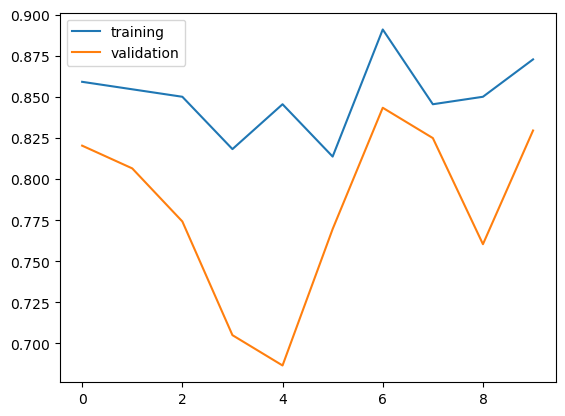

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('images/train/sideways/dog.11124.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='dog_sideways_11124', save_format='jpg'):
    i += 1
    if i > 20:
        break 

In [35]:
def add(a,b):
    return a+b

In [36]:
add(2,4)

6

In [37]:
add(2,"dsd")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [65]:
def addition(a,b):    
    if (isinstance(a, int)) and (isinstance(b, int)):
            return add(a,b)
    else:
        print('check the data type is int')
    


In [67]:
addition(3,'s')

check the data type is int
